In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [70]:
df = pd.read_csv("data/epa-sea-level.csv")
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


Text(0.5, 1.0, 'Rise in Sea Level')

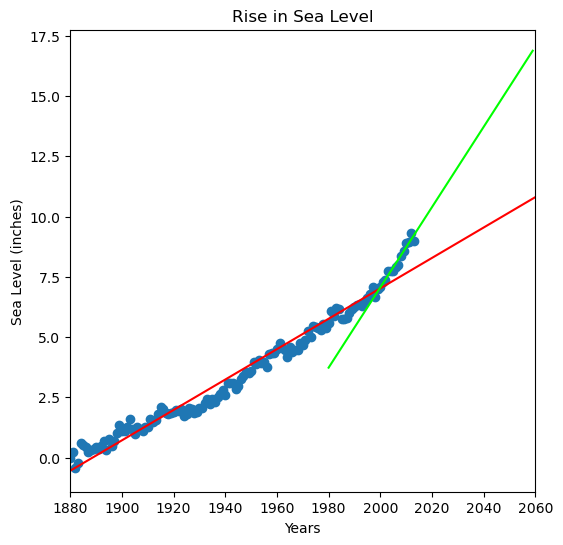

In [111]:

# fig is the canvas ax is the plot
fig, ax = plt.subplots(figsize = (6, 6))

# makes it so there is no margin with the plot
ax.margins(x = 0)

# graphs the normal data as a scatterplot
ax.scatter(x = df["Year"], y = df["CSIRO Adjusted Sea Level"])

# linregress gives you about 5 outputs (slope, y-intercept, p-value, stderr, rvalue) to understand how this works view https://www.youtube.com/watch?v=bmFVs5XkUbM
res = linregress(df["Year"], df["CSIRO Adjusted Sea Level"])

# makes a new array of all the original x values but adds 2061, [all-original-x-values THRU 2061]
years = np.arange(df["Year"].min(), 2061)

# y = mx + b
preds = res.intercept + res.slope * years

# draws first line
ax.plot(years, preds, label='fitted line', color = "red")

# draws second line
# drops the values that are before 2000
df_new = df.drop(df[df["Year"] < 2000].index)

# change from 1980 to 2000 to make the yellow line shorter
years2 = np.arange(1980, years.max())
res2 = linregress(df_new["Year"], df_new["CSIRO Adjusted Sea Level"])
preds2 = res2.intercept + res2.slope * years2
ax.plot(years2, preds2, label='fitted line 2', color = "lime")

# titles everything
ax.set_ylabel("Sea Level (inches)")
ax.set_xlabel("Years")
ax.set_title("Rise in Sea Level")

